In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Main DataFrame Name: "grouped_frame"

grouped_frame = pd.read_csv('grouped_data.csv')

grouped_frame.set_index(['Country Name', 'Indicator Name'], inplace = True)
grouped_frame.sort_values(by = ['Country Name'], inplace = True)


for column in grouped_frame.columns:
    grouped_frame[column].astype('float')


ValueError: Could not interpret value `Population, total` for parameter `y`

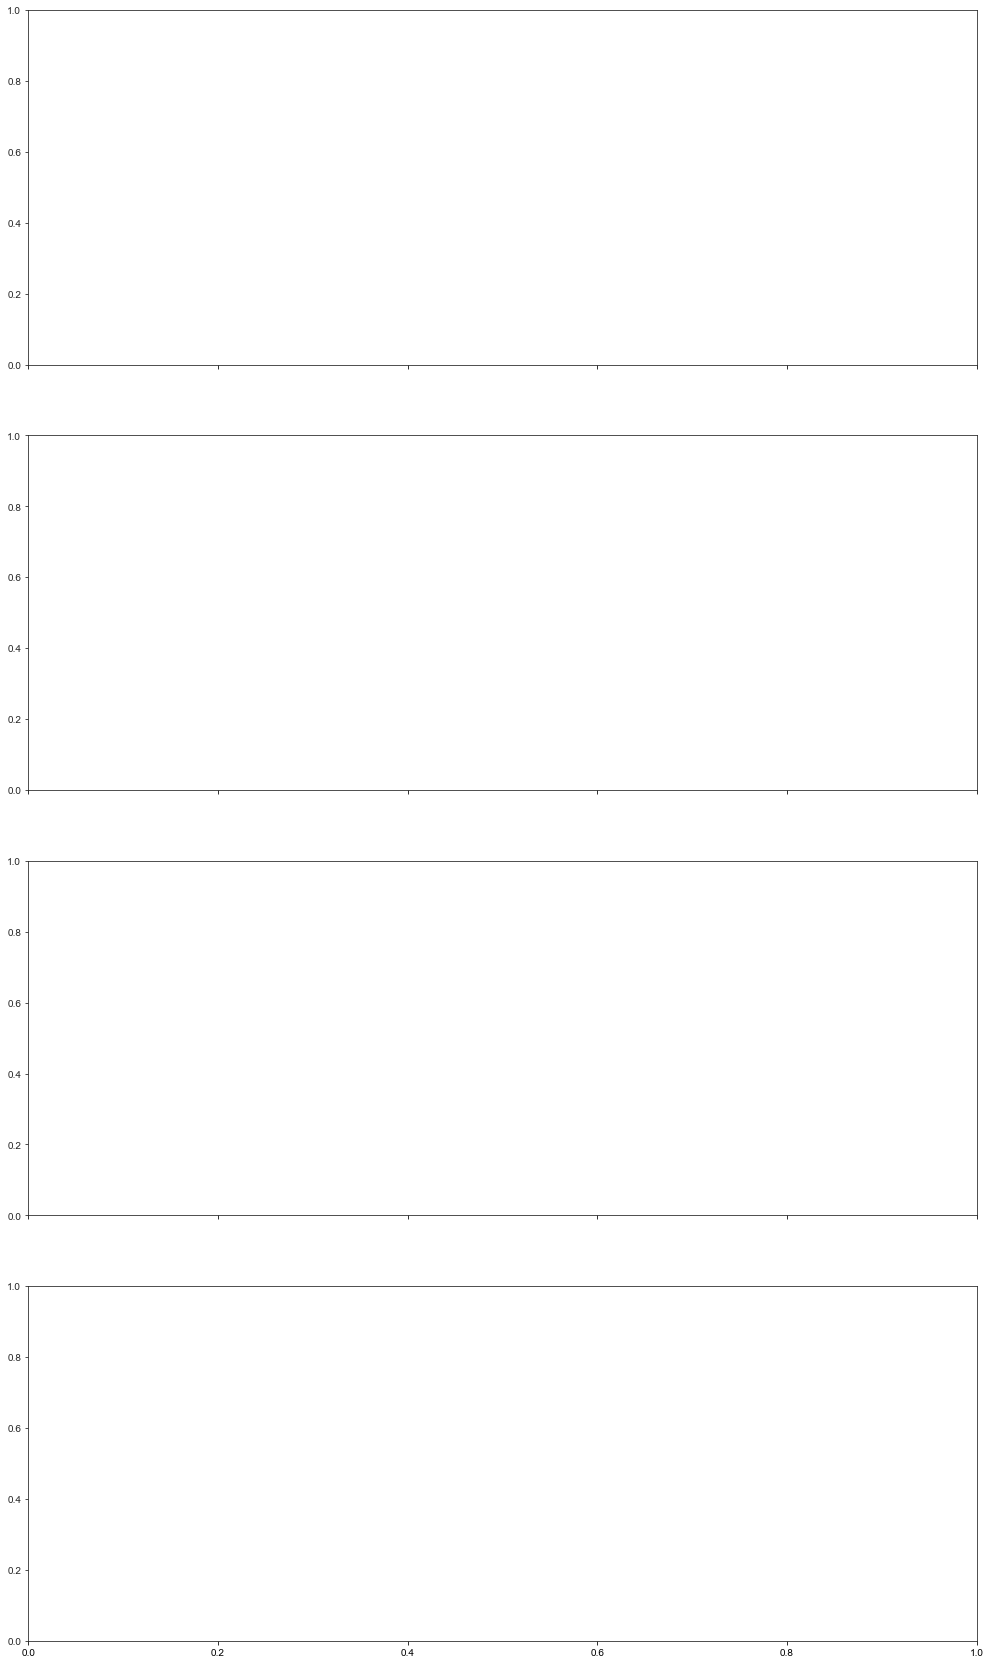

In [95]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

def create_subset(df, indicators, country):
    subset = df.reset_index()
    subset = subset[
            (subset['Country Name'] == country)
        ].drop(columns = 'Country Name'
        ).set_index('Indicator Name').T

    subset.columns.name = None
    subset.index.name = 'Year'
    subset.reset_index(inplace = True)
    subset.columns = [
        'Year', 
        'Population', 
        'CO2 Emissions', 
        'Renewable Energy Consumption', 
        'Mortality Rate (under-5)', 
        'Annual Freshwater Withdrawals', 
        'Forest Area'
    ]
    
    return subset, subset.columns[1:]
    
def plot_data(df, country):
    
    year = mdates.YearLocator()
    sns.set_style("ticks",{"xtick.color": 'black','axes.grid': False})
    fig, axs = plt.subplots(4,figsize = (17,30), gridspec_kw={'height_ratios':[1,1,1,1]}, sharex = True)
    #sns.lineplot(data = subset, x = 'Year', y = subset.indicators, ax = axs[0])
    
    indicators = df.index.get_level_values(1).unique().tolist()
    #countries = df.index.get_level_values(0).unique().tolist()
    
    for i, indicator in enumerate(indicators):
        subset, cleaned_indicators = create_subset(df, indicators, country)
        sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[0], ax = axs[i])
        sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[0], ax = axs[i+1])
        sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[0], ax = axs[i+1])
        sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[0], ax = axs[i+2])
        sns.lineplot(data = subset, x = 'Year', y = cleaned_indicator[0], ax = axs[i+3])
  
    return plt
    
    
#visual = plot_data(grouped_frame)
#visual.show()

countries = grouped_frame.index.get_level_values(0).unique().tolist()
country = countries[0]
subset =  plot_data(grouped_frame, country)
subset